## Load libraries

In [1]:
# tensorflow backend
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
# vae stuff
from chemvae.vae_utils import VAEUtils
from chemvae import mol_utils as mu
# import scientific py
import numpy as np
import pandas as pd
# rdkit stuff
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

RDKit WARNING: [17:01:45] Enabling RDKit 2019.09.3 jupyter extensions
Using TensorFlow backend.
/Users/dsw46/opt/anaconda3/envs/chemvae/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/dsw46/opt/anaconda3/envs/chemvae/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/dsw46/opt/anaconda3/envs/chemvae/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:473: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) 

# Load a model

In [2]:
vae = VAEUtils(directory='models/zinc_properties')

/Users/dsw46/opt/anaconda3/envs/chemvae/lib/python3.6/site-packages/keras/models.py:245: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Using standarized functions? True
Standarization: estimating mu and std values ...done!


# Using the VAE


## Decode/Encode 

Might not be perfect (it's probabilistic), try it several times.

smiles <i class="fa fa-arrow-right" aria-hidden="true"></i> x <i class="fa fa-arrow-right" aria-hidden="true"></i> z <i class="fa fa-arrow-right" aria-hidden="true"></i> x_r <i class="fa fa-arrow-right" aria-hidden="true"></i> smiles_r

In [19]:
smiles_1 = mu.canon_smiles('CSCC(=O)NNC(=O)c1c(C)oc(C)c1C')

X_1 = vae.smiles_to_hot(smiles_1,canonize_smiles=True)
z_1 = vae.encode(X_1)
X_r= vae.decode(z_1)

print('{:20s} : {}'.format('Input',smiles_1))
print('{:20s} : {}'.format('Reconstruction',vae.hot_to_smiles(X_r,strip=True)[0]))

print('{:20s} : {} with norm {:.3f}'.format('Z representation',z_1.shape, np.linalg.norm(z_1)))

Input                : CSCC(=O)NNC(=O)c1c(C)oc(C)c1C
Reconstruction       : CSC@(=O)NC(=O)cc1c(C)oc(C)c1C
Z representation     : (1, 196) with norm 10.695


In [24]:
z_1.shape

(1, 196)

In [11]:
smiles_1 = mu.canon_smiles('CSCC(=O)NNC(=O)c1c(C)oc(C)c1C')

def encode(smiles):
    X_1 = vae.smiles_to_hot(smiles,canonize_smiles=True)
    return vae.encode(X_1)
encodings = [encode(smiles_1) for _ in range(5)]

In [14]:
encodings[1].all() == encodings[2].all()

True

## property preditor

In [4]:
print('Properties (qed,SAS,logP):')
y_1 = vae.predict_prop_Z(z_1)[0]
print(y_1)

Properties (qed,SAS,logP):
[0.7728677  2.433176   0.95585614]


## Decode several attempts
VAE are probabilistic

Searching molecules randomly sampled from 5.00 std (z-distance) from the point
Found 12 unique mols, out of 71
SMILES
 0     CSCC(=O)NNC(=O)c1c(C)oc(C)c1C
1     CSC(C=O)NNC(=O)c1c(C)oc(C)c1C
2     COCC(=O)NC(C=O)c1c(C)oc(C)c1C
3     CSCC(=O)NCC(=O)c1c(C)oc(C)c1C
4     COC(C=O)NNC(=O)c1c(C)oc(C)c1C
5     COCC(=O)NCC(=O)c1c(C)oc(C)c1C
6     CSCC(=O)NCC(=O)c1c(O)oc(C)c1C
7     CSC(C=O)NCC(=O)c1c(C)oc(C)c1C
8     CSC(C=O)NCC(=O)c1c(F)oc(C)c1C
9     COC(C=O)NCC(=O)c1c(C)oc(C)c1C
10    CSCC(=O)N/C(=O)c1c(C)oc(C)c1C
11    ClCC(=O)NCC(=O)c1c(C)oc(C)c1C
Name: smiles, dtype: object


RDKit ERROR: [17:06:51] SMILES Parse Error: syntax error while parsing: CSC@(=O)NC(=O)cc1c(C)oc(C)c1C
RDKit ERROR: [17:06:51] SMILES Parse Error: Failed parsing SMILES 'CSC@(=O)NC(=O)cc1c(C)oc(C)c1C' for input: 'CSC@(=O)NC(=O)cc1c(C)oc(C)c1C'
RDKit ERROR: [17:06:51] non-ring atom 8 marked aromatic
RDKit ERROR: [17:06:51] SMILES Parse Error: syntax error while parsing: ClC@(=O)NCC(=O)c1c(C)oc(C)c1C
RDKit ERROR: [17:06:51] SMILES Parse Error: Failed parsing SMILES 'ClC@(=O)NCC(=O)c1c(C)oc(C)c1C' for input: 'ClC@(=O)NCC(=O)c1c(C)oc(C)c1C'
RDKit ERROR: [17:06:51] non-ring atom 8 marked aromatic
RDKit ERROR: [17:06:51] SMILES Parse Error: syntax error while parsing: CSC@(=O)NCC(=O)c1c(C)oc(C)c1C
RDKit ERROR: [17:06:51] SMILES Parse Error: Failed parsing SMILES 'CSC@(=O)NCC(=O)c1c(C)oc(C)c1C' for input: 'CSC@(=O)NCC(=O)c1c(C)oc(C)c1C'
RDKit ERROR: [17:06:51] non-ring atom 6 marked aromatic
RDKit ERROR: [17:06:51] non-ring atom 8 marked aromatic
RDKit ERROR: [17:06:51] Can't kekulize mol.  Un

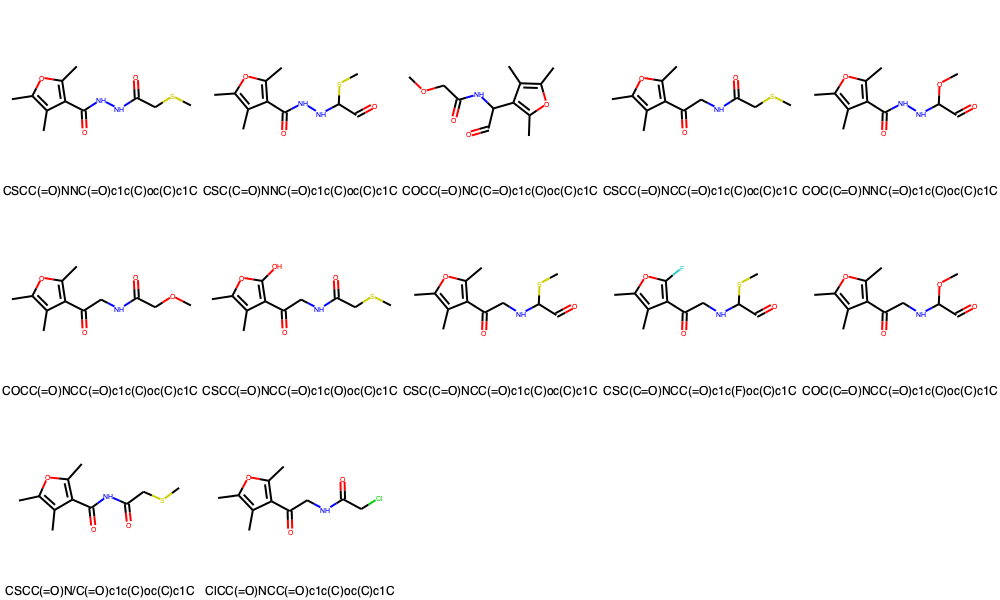

,smiles,distance,count,frequency,mol
0,CSCC(=O)NNC(=O)c1c(C)oc(C)c1C,0.000005,4,0.056338,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,CSC(C=O)NNC(=O)c1c(C)oc(C)c1C,3.174025,2,0.028169,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,COCC(=O)NC(C=O)c1c(C)oc(C)c1C,4.123037,1,0.014085,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,CSCC(=O)NCC(=O)c1c(C)oc(C)c1C,4.743930,34,0.478873,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,COC(C=O)NNC(=O)c1c(C)oc(C)c1C,5.083301,2,0.028169,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [5]:
noise=5.0
print('Searching molecules randomly sampled from {:.2f} std (z-distance) from the point'.format(noise))
df = vae.z_to_smiles( z_1,decode_attempts=100,noise_norm=noise)
print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
print('SMILES\n',df.smiles)
display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))
df.head()

## PCA of latent space

Sample random points from the training set along with properties

In [6]:
Z, data, smiles = vae.ls_sampler_w_prop(size=50000,return_smiles=True)
prop_opt = 'qed'
prop_df = pd.DataFrame(data).reset_index()
prop_df['smiles']=smiles
prop_df.head()

,index,logP,qed,SAS,smiles
0,10827,1.62790,0.840206,2.943992,CC(C)[C@H](CO)N(Cc1ccccc1)S(=O)(=O)c1cnn(C)c1
1,84297,2.83130,0.843065,3.584943,CCc1cnc(CCNC(=O)N[C@@H]2CCC[C@H]2SC)s1
2,124294,2.40290,0.850229,1.977132,O=C(CCc1ccc2c(c1)OCCCO2)N1CCCC1
3,58893,3.96762,0.847755,2.509305,Cc1cc(OCC(=O)N[C@H](C)c2ccco2)ccc1C(C)C
4,115333,2.52846,0.593666,2.630168,Cc1ccccc1S(=O)(=O)/N=C(\[O-])CCOc1cccc(C)c1C


Perform a PCA projection and color the points based on a property

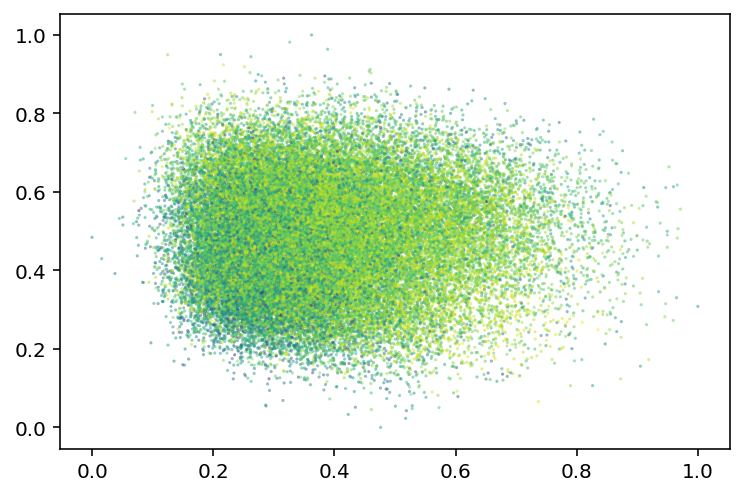

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# do pca and normalize
Z_pca = PCA(n_components=2).fit_transform(Z)
Z_pca = MinMaxScaler().fit_transform(Z_pca)

df = pd.DataFrame(np.transpose((Z_pca[:,0],Z_pca[:,1])))
df.columns = ['x','y']
df[prop_opt]=prop_df[prop_opt]

plt.scatter(x=df['x'], y=df['y'], c=df[prop_opt],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.show()

compare with t-SNE, will take some time

In [8]:
from sklearn.manifold import TSNE

Z_tsne = TSNE(n_components=2).fit_transform(Z)
Z_tsne = MinMaxScaler().fit_transform(Z_tsne)

f = pd.DataFrame(np.transpose((Z_tsne[:,0],Z_tsne[:,1])))
df.columns = ['x','y']
df[prop_opt]=prop_df[prop_opt]

plt.scatter(x=df['x'], y=df['y'], c=df[prop_opt],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.show()

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements